## Data Set Information:

* The dataset was downloaded from the UCI Machine Learning Repository.

* These datasets can be viewed as classification tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

* Two datasets were combined and few values were randomly removed.

### Attribute Information:


    - Input variables (based on physicochemical tests): 
       - 1 - fixed acidity 
       - 2 - volatile acidity 
       - 3 - citric acid 
       - 4 - residual sugar 
       - 5 - chlorides 
       - 6 - free sulfur dioxide 
       - 7 - total sulfur dioxide 
       - 8 - density 
       - 9 - pH 
       - 10 - sulphates 
       - 11 - alcohol Output variable (based on sensory data): 
       - 12 - quality (score between 0 and 10)
        
### It's a classification problem i will try to 'Predict Wine Type'        

In [133]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
# Load the dataset
df = pd.read_csv('wine quality.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [136]:
df.shape

(6497, 13)

In [137]:
#Check for missing values
df.isna().mean()

type                    0.000000
fixed acidity           0.001539
volatile acidity        0.001231
citric acid             0.000462
residual sugar          0.000308
chlorides               0.000308
free sulfur dioxide     0.000000
total sulfur dioxide    0.000000
density                 0.000000
pH                      0.001385
sulphates               0.000616
alcohol                 0.000000
quality                 0.000000
dtype: float64

In [138]:
#I decided to drop na if its less then 10%
df.dropna(inplace=True)

In [139]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.221066,0.323744,-0.113442,0.299104,-0.283485,-0.330543,0.459713,-0.251121,0.301263,-0.096190,-0.076174
volatile acidity,0.221066,1.000000,-0.377512,-0.196677,0.377995,-0.353402,-0.414729,0.272101,0.260134,0.225656,-0.039528,-0.266677
citric acid,0.323744,-0.377512,1.000000,0.142324,0.039412,0.132271,0.194398,0.097068,-0.327860,0.059070,-0.010056,0.084926
residual sugar,-0.113442,-0.196677,0.142324,1.000000,-0.128814,0.403449,0.495684,0.551494,-0.266481,-0.185616,-0.359132,-0.034654
chlorides,0.299104,0.377995,0.039412,-0.128814,1.000000,-0.195428,-0.279602,0.363108,0.044653,0.396240,-0.257664,-0.200553
free sulfur dioxide,-0.283485,-0.353402,0.132271,0.403449,-0.195428,1.000000,0.721476,0.025113,-0.145164,-0.188947,-0.179477,0.054924
total sulfur dioxide,-0.330543,-0.414729,0.194398,0.495684,-0.279602,0.721476,1.000000,0.031419,-0.237204,-0.275878,-0.264385,-0.041598
density,0.459713,0.272101,0.097068,0.551494,0.363108,0.025113,0.031419,1.000000,0.012525,0.260019,-0.687432,-0.304447
pH,-0.251121,0.260134,-0.327860,-0.266481,0.044653,-0.145164,-0.237204,0.012525,1.000000,0.190864,0.120473,0.018403
sulphates,0.301263,0.225656,0.059070,-0.185616,0.396240,-0.188947,-0.275878,0.260019,0.190864,1.000000,-0.004116,0.039054


<AxesSubplot:>

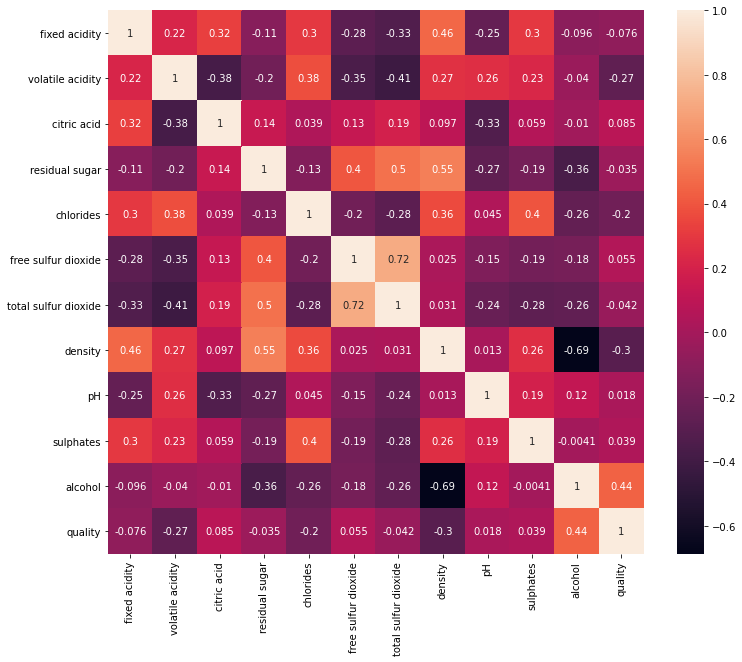

In [140]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), annot = True)

# LabelEncoder

In [142]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [143]:
le.classes_

array(['red', 'white'], dtype=object)

In [144]:
le.transform(le.classes_)

array([0, 1])

In [145]:
dict(zip(le.classes_, le.transform(le.classes_)))

{'red': 0, 'white': 1}

In [146]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [147]:
df['type'].value_counts()

1    4870
0    1593
Name: type, dtype: int64

In [148]:
# i choose 'total and free sulfur dioxide' because it has 0.72 corrolation
X = df[['free sulfur dioxide', 'total sulfur dioxide']]
y = df['type']
X.head()

,free sulfur dioxide,total sulfur dioxide
0,45.0,170.0
1,14.0,132.0
2,30.0,97.0
3,47.0,186.0
4,47.0,186.0


In [149]:
#split to train and test for cross-validation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [150]:
#scale the features using training set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train),columns=X.columns)
X_test_scaled = pd.DataFrame(sc.transform(X_test),columns=X.columns)

In [151]:
#import Logistic Regression 
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500, tol=0.001)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500, tol=0.001)

In [152]:
#Validating the model
#Performance measures for classification
#Accuracy = total no. of correct prediction/total no. of instances
model.score(X_test_scaled,y_test)

0.9303764827230531

In [153]:
model.intercept_ #b0

array([2.84957631])

In [154]:
model.coef_ #coefficients of the features, b1, b2, ...

array([[-0.50534518,  3.91462108]])

In [155]:
#Whereas predict method gives the class prediction as either 0 or 1
y_predict = model.predict(X_test_scaled)
y_predict[10:20]

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 1])

In [156]:
#k-fold cross-validation score
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(max_iter=1000,tol=0.001),
                X_train_scaled, y_train,cv=4).mean().round(4)*100

93.08

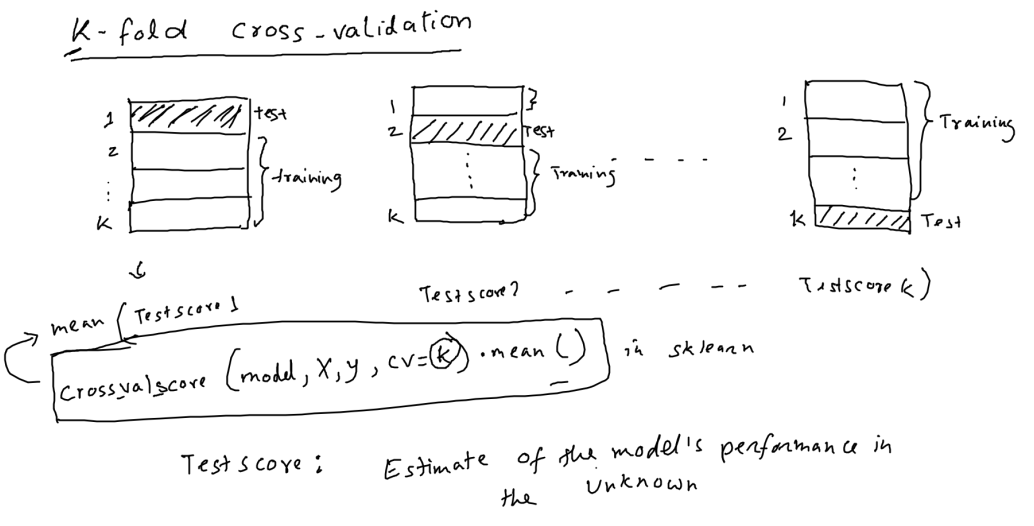

In [157]:
from sklearn.metrics import confusion_matrix, classification_report

In [158]:
#classification report (Macro recall and precision for multiclass Classification)
#Precision = tp/fp+tp
#Recall = tp/fn+tp
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.90      0.81      0.85       474
           1       0.94      0.97      0.95      1465

    accuracy                           0.93      1939
   macro avg       0.92      0.89      0.90      1939
weighted avg       0.93      0.93      0.93      1939



#Precision determines the fraction of records that actually turns out to be positive in the group the classifier has declared as a positive class. The higher the precision is, the lower the number of False Positives committed by the model.
#Precision1 = tp/fp+tp =1421/1512 = 0.94
precision 0 =tn/tn+fn  = 383/383+44= 0.90
Recall for class 1 =tp/fn+tp =1421/44+1421=0.97




In [159]:
'''
        Predicted
        0   1
True  0 TN  FP
      1 FN  TP

'''
confusion_matrix(y_test,y_pred)

array([[ 383,   91],
       [  44, 1421]], dtype=int64)

In [167]:
#Fpr = fp/(tn+fp)
#tpr = tp/(fn+tp)

fpr1= 1421/383+91
tpr1 = 1421/44+1421 


In [160]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_predict)

0.9303764827230531

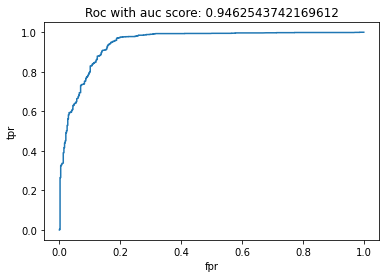

In [161]:
#ROC is the curve traced by the co-ordinates (FPR,TPR) 
#for different probability threshold values
#AUC is the area under the ROC curve

from sklearn.metrics import roc_auc_score, roc_curve
y_pred_prob = model.predict_proba(X_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)


import  matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Roc with auc score: {}'.format(roc_auc_score(y_test,y_pred_prob)))
plt.show()

AUC is an excellent performance measure for Logistic Regression Model as it is robust against probability threshold values and truly depicts if the model is good or not for the data at hand. Here 0.95 means that Logistic Regression Model is a very good fit for the data.